# Solar System Stern-Levison $\Lambda$

Plots Stern-Levison's $\Lambda$ parameter quantifying "orbital dominance":
\begin{equation}
  \Lambda = 0.0043\left(\frac{M}{10^{21}\mathrm{kg}}\right)^2 a_{\mathrm au}^{-3/2}
\end{equation}
as a function of versus orbital semimajor axis for the solar system. 

Citation: Stern, A.S. & Levison, H.F. [(2022,HiA,12,205)](https://ui.adsabs.harvard.edu/abs/2002HiA....12..205S)

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

#### Aspect Ratio

`aspect` sets the aspect ratio, width/height.  The default aspect ratio is 4:3, 1:1 for square plots, 
and 5:2 (2.5:1) for spectra, and equal aspect ratio for images and plots of Cartesian coordinates.
Use a formula instead of decimal when the result is a fraction (example: `aspect = 4.0/3.0` instead of
`aspect=1.33`).

In [2]:
# aspect ratio

plotWide = True # wide-screen vs. letter sized

if plotWide:
    aspect = 16.0/9.0 # wide-screen
    aspStr = '16x9'
else:
    aspect = 4.0/3.0
    aspStr = '4x3'

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Solar system data

### Planets, Dwarf Planets, and Giant Moons

Planets, dwarf planets, and giant moons are from the JPL Solar System Dynamics database, extracted and organized
into a single CSV file `MassOrbit_Major.csv`.  For this plot we use 4 columns:
 * `Body` - name of the body
 * `a` - orbit semimajor axis in au
 * `M` - mass in units of kg
 * `Type` - body type code: T = terrestrial planet, G = gas giant, I = ice giant, D = dwarf planet, DC = dwarf planet candidate, GM = giant moon.

In [3]:
dataDir = 'MassOrbit'
majorFile = 'MassOrbit_Major.csv'

data = pd.read_csv(f'{dataDir}/{majorFile}',comment='#')
bodyName = np.array(data['Body'])
bodyType = np.array(data['Type'])
bodyMass = np.array(data['M']) # units of kg
bodyAU = np.array(data['a']) # units of au

# compute Stern-Levison Lambda

bodyLambda = 0.0043*(bodyMass/1.0e21)**2/(bodyAU**1.5)

# colors etc. to code bodies

bodySize = {'T':5,'G':8,'I':6,'D':4,'DC':3,'GM':3}
bodyColor = {'T':'#bbbbbb','G':'beige','I':'cyan','D':'snow','DC':'white','GM':'orange'}

## Plot the figure

Plot Stern-Levinson $\Lambda$ vs $a$ for solar system bodies.  Annotate with colors and labels for specific
bodies.

Also draw the $\Lambda=1$ line that demarcates mass dominance ($\Lambda>1$)

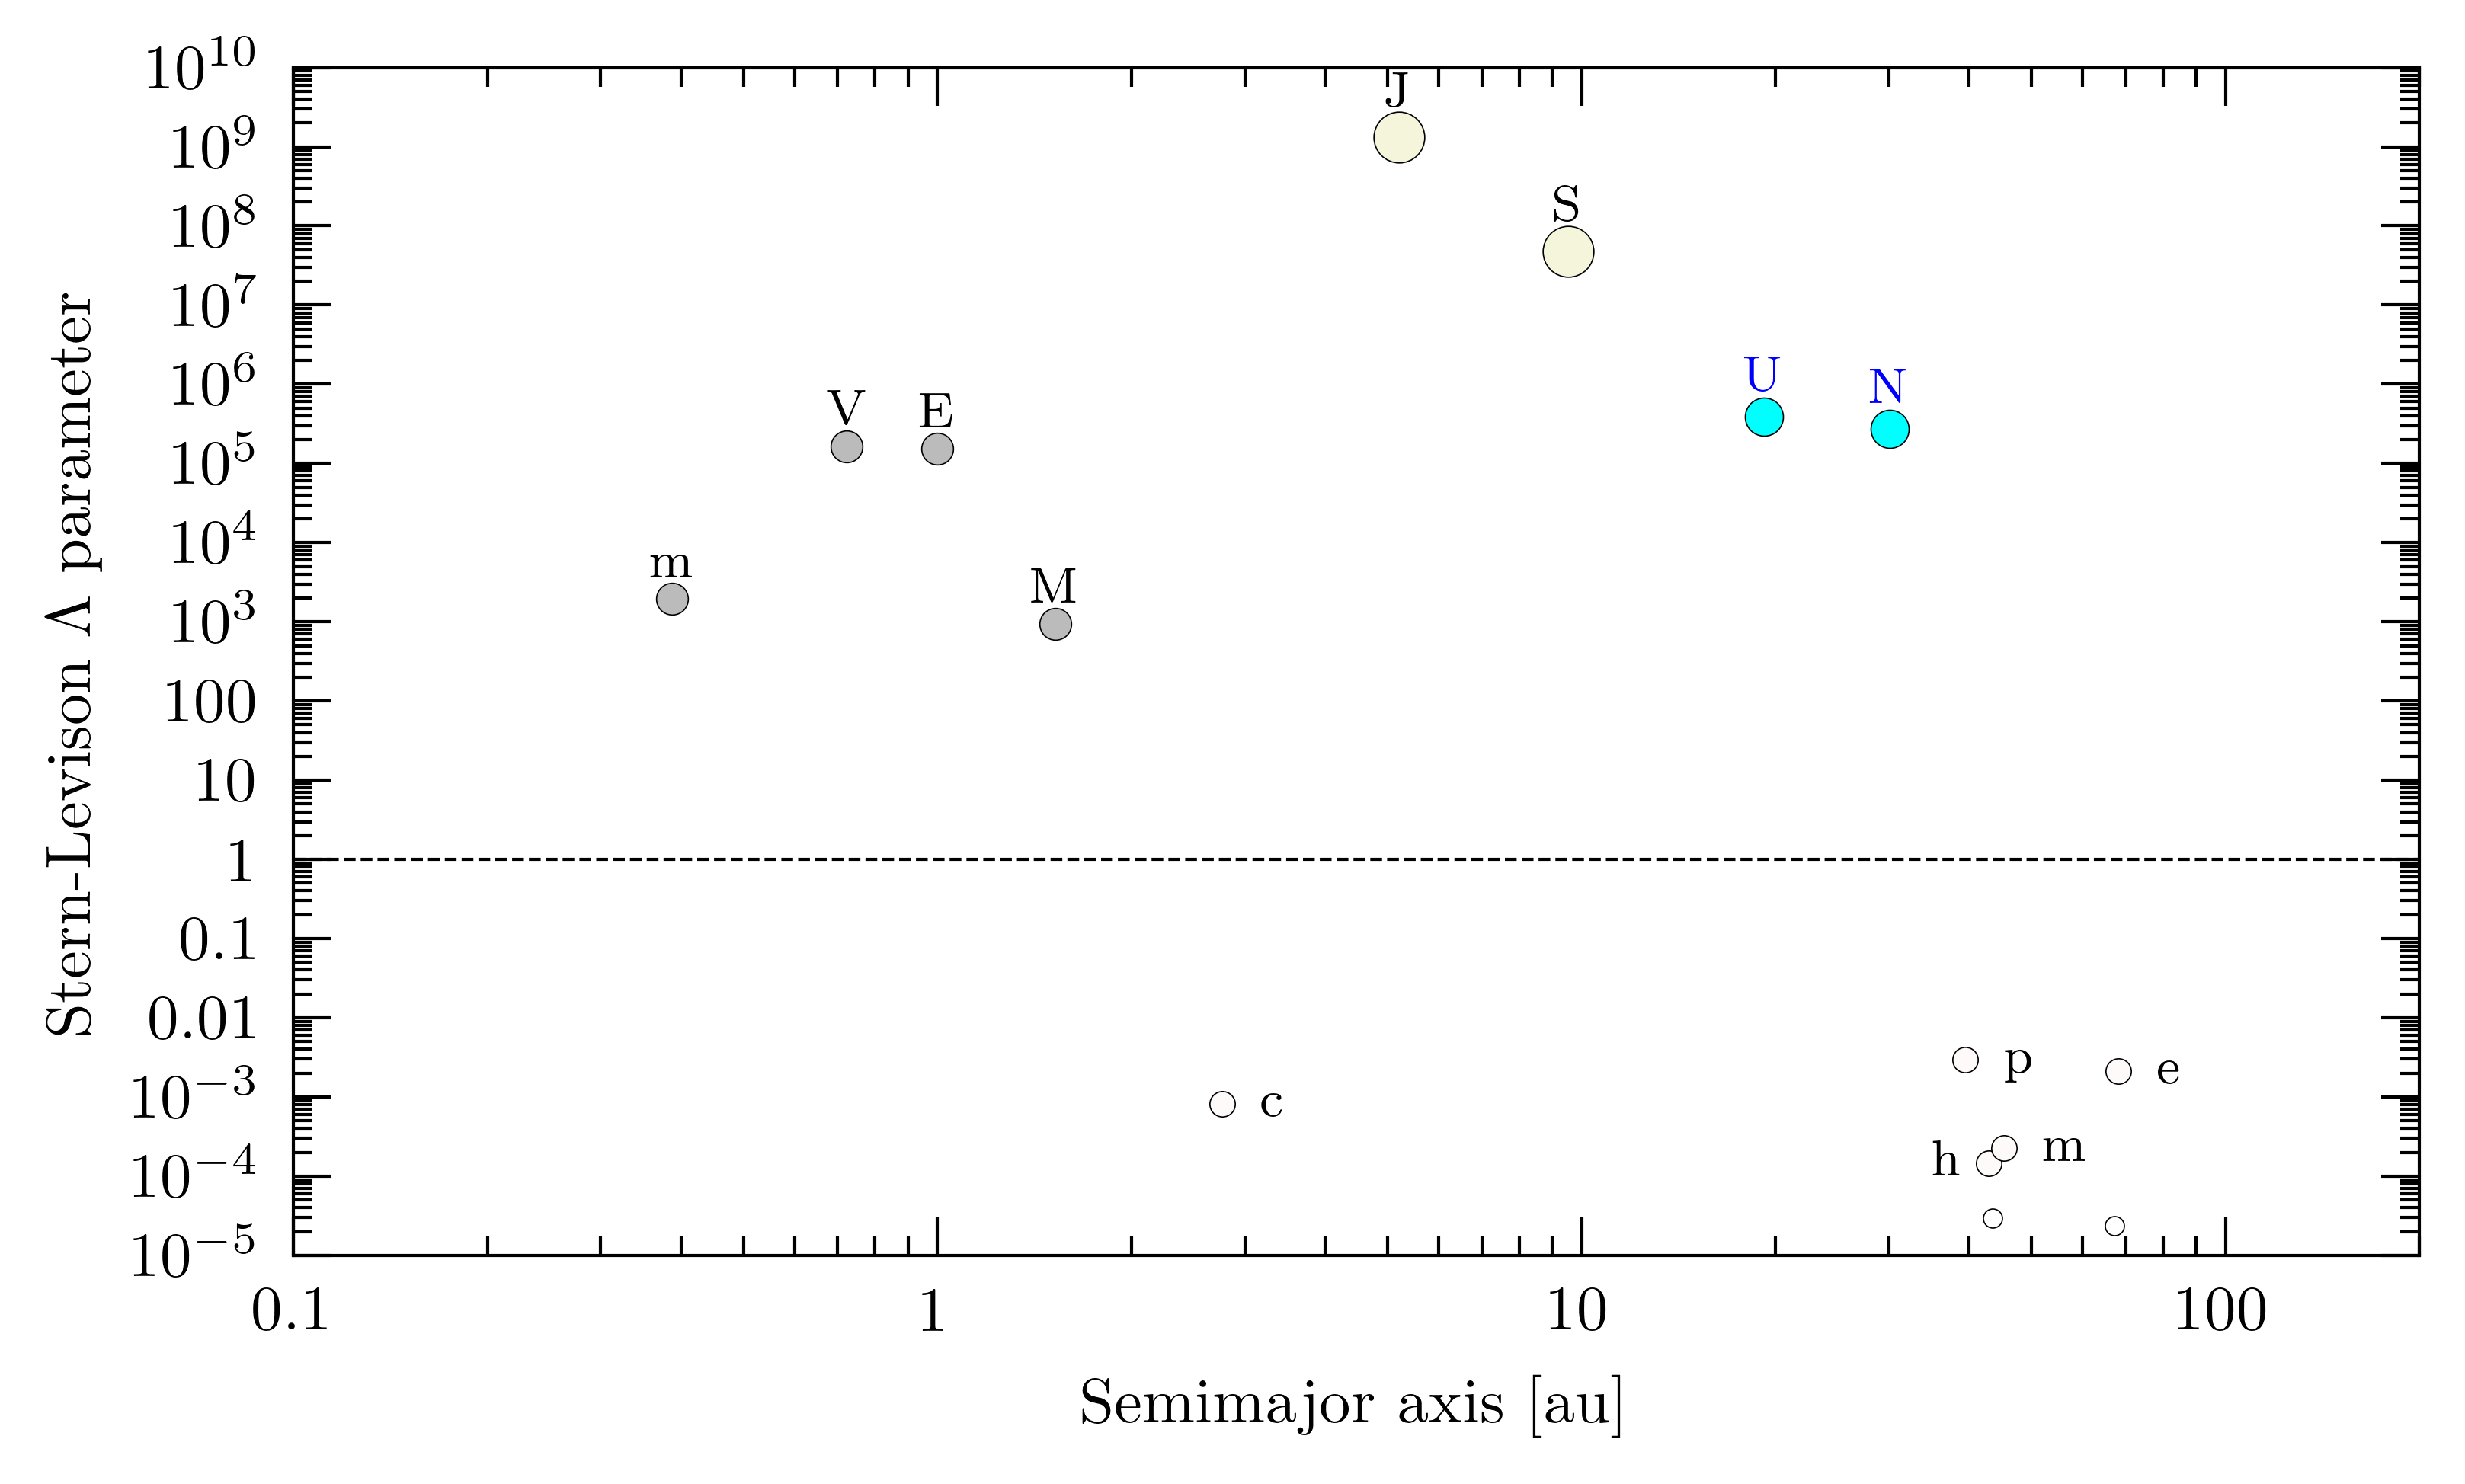

In [4]:
plotFile = f'Stern-Levison_Lambda.png'

# axis limits

aMin = 0.1 # au
aMax = 200 # au
LamMin = 1.0e-5
LamMax = 1.0e10

# do it

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

ax.set_xlim(aMin,aMax)
ax.set_xscale('log')
ax.set_xticks([0.1,1,10,100])
ax.set_xticklabels(['0.1','1','10','100'])
ax.set_xlabel(r'Semimajor axis [au]',fontsize=axisFontSize)

ax.set_ylim(LamMin,LamMax)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0e-5,1.0e-4,1.0e-3,0.01,0.1,1,10,100,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
ax.set_yticklabels([r'10$^{-5}$',r'10$^{-4}$',r'10$^{-3}$','0.01','0.1','1','10','100',r'10$^{3}$',r'10$^{4}$',
                    r'10$^{5}$',r'10$^{6}$',r'10$^{7}$',r'10$^{8}$',r'10$^{9}$',r'10$^{10}$'])
ax.set_ylabel(r'Stern-Levison $\Lambda$ parameter',fontsize=axisFontSize)

# Major bodies (planets, dwarf planets) but don't plot moons!

for i in range(len(bodyName)):
    t = bodyType[i]
    if t != 'GM':
        ax.plot(bodyAU[i],bodyLambda[i],'o',mfc=bodyColor[t],mec='black',ms=bodySize[t],mew=0.2,zorder=10)

    if t == 'D':
        labelTxt = bodyName[i].lower()
        if bodyName[i] in ['Pluto','Eris','Ceres']:
            ax.text(1.15*bodyAU[i],bodyLambda[i],labelTxt[0],va='center',ha='left',fontsize=labelFontSize,
                    color='black')
        elif bodyName[i] == 'Makemake':
            ax.text(1.15*bodyAU[i],bodyLambda[i],'m',va='center',ha='left',fontsize=labelFontSize,
                    color='black')
        elif bodyName[i] == 'Haumea':
            ax.text(bodyAU[i]/1.1,bodyLambda[i],'h',va='center',ha='right',fontsize=labelFontSize,
                    color='black')
            
    elif t == 'G':
        labelTxt = bodyName[i]
        ax.text(bodyAU[i],1.8*bodyLambda[i],labelTxt[0],va='bottom',ha='center',fontsize=labelFontSize,
                color='black')    
        
    elif t == 'I':
        labelTxt = bodyName[i]
        ax.text(bodyAU[i],1.6*bodyLambda[i],labelTxt[0],va='bottom',ha='center',fontsize=labelFontSize,
                color='blue')    

    elif t == 'T':
        labelTxt = bodyName[i][0]
        if bodyName[i]=='Mercury':
            ax.text(bodyAU[i],1.4*bodyLambda[i],'m',va='bottom',ha='center',fontsize=labelFontSize,
                color='black')
        else:
            ax.text(bodyAU[i],1.4*bodyLambda[i],labelTxt,va='bottom',ha='center',fontsize=labelFontSize,
                color='black')

# orbital dominance line

ax.hlines(1.0,aMin,aMax,ls=['--'],colors=['black'],lw=0.5,zorder=8)

# make the plot and hardcopy

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()